In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
df=pd.read_csv("./data/ECG200_TRAIN.txt", header=None, sep='\s+')

In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1.0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1.0,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1.0,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1.0,1.168874,2.075901,1.760140,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1.0,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

In [26]:
X_train = np.array([df.iloc[col,1:].cumsum().values for col in range(len(df))])
y_train = df.iloc[:,0]

In [39]:
X_train.shape

(100, 96)

In [28]:
sel=SelectKBest(k=10)
lr=LogisticRegression(random_state=42)
pipe=make_pipeline(sel, lr)

In [29]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x00000137F0E527B8>)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [30]:
pipe.score(X_train, y_train)

0.86

In [31]:
lr=LogisticRegression()
Ks = [k for k in range(2,97)]
scores = []
for k in Ks:
    sel=SelectKBest(k=k)
    pipe=make_pipeline(sel, lr)
    pipe.fit(X_train,y_train)
    scores.append(pipe.score(X_train,y_train))
    

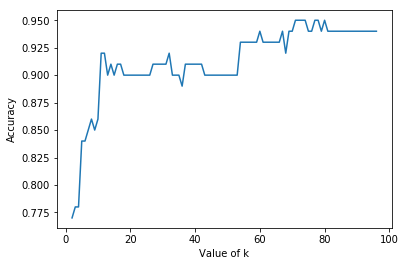

In [32]:
plt.plot(Ks, scores)
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.show()

In [33]:
sel=SelectKBest(k=65)
sel.fit(X_train,y_train)

SelectKBest(k=65, score_func=<function f_classif at 0x00000137F0E527B8>)

In [36]:
normalized_scores = (sel.scores_-sel.scores_.min())/(sel.scores_.max()-sel.scores_.min())

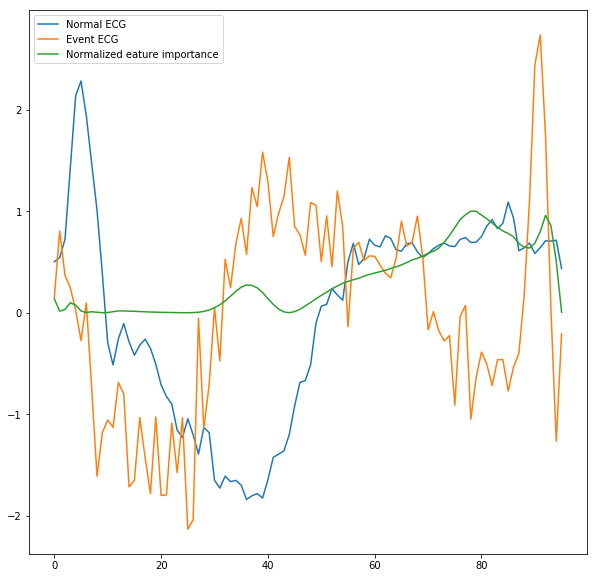

In [38]:
plt.figure(figsize=(10,10))
plt.plot(df.iloc[0,1:].values, label="Normal ECG")
plt.plot(df.iloc[1,1:].values, label="Event ECG")
plt.plot(normalized_scores, label="Normalized eature importance")
plt.legend()
plt.show()